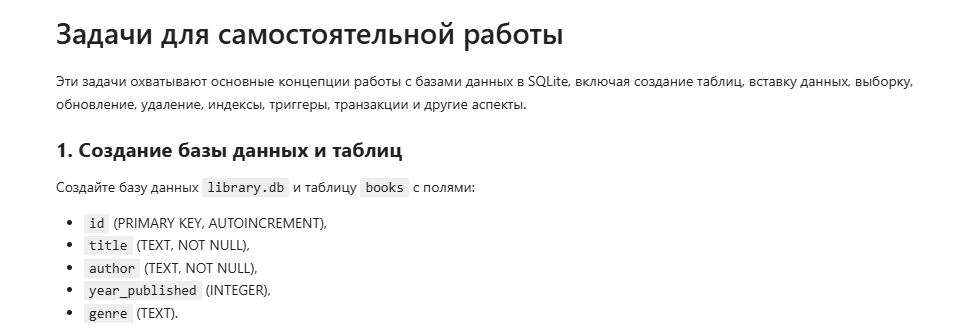

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    author TEXT NOT NULL,
    year_published INTEGER,
    genre TEXT
);
"""

cursor.execute(query)
connection.commit()

connection.close()

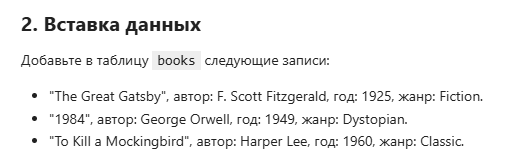

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()




cursor.executemany("""
INSERT INTO books (title, author, year_published, genre)
VALUES (?, ?, ?, ?);
""",
 [("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"), ("1984", "George Orwell", 1949, "Dystopian"), ("To Kill a Mockingbird","Harper Lee", 1960, "Classic")])


connection.commit()

connection.close()

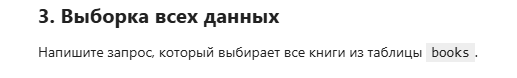

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
SELECT * FROM books;
""")
rows = cursor.fetchall()

for row in rows:
    print(row)



connection.commit()
connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1949, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


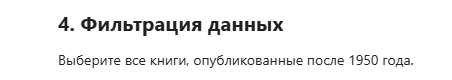

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
SELECT * FROM books WHERE year_published > 1950;
""")
rows = cursor.fetchall()

for row in rows:
    print(row)



connection.commit()
connection.close()

(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


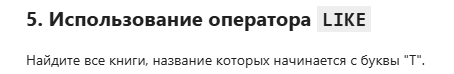

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
SELECT * FROM books WHERE title LIKE ?;
""", ("T%",))
rows = cursor.fetchall()

for row in rows:
    print(row)


connection.commit()
connection.close()


(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


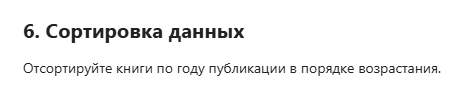

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
SELECT * FROM books ORDER BY year_published ASC;
""")
rows = cursor.fetchall()

for row in rows:
    print(row)


connection.commit()
connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1949, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


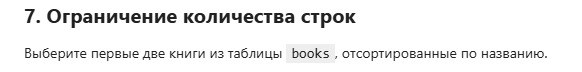

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
SELECT * FROM books ORDER BY title ASC LIMIT 2;
""")
rows = cursor.fetchall()

for row in rows:
    print(row)


connection.commit()
connection.close()

(2, '1984', 'George Orwell', 1949, 'Dystopian')
(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')


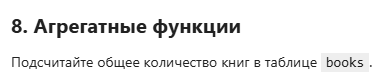

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
SELECT COUNT(*) AS total_books FROM books;
""")
rows = cursor.fetchall()

for row in rows:
    print(row)


connection.commit()
connection.close()

(3,)


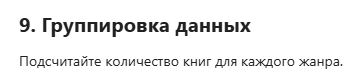

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
SELECT genre, COUNT(*) AS count FROM books GROUP BY genre;
""")
rows = cursor.fetchall()

for row in rows:
    print(row)


connection.commit()
connection.close()

('Classic', 1)
('Dystopian', 1)
('Fiction', 1)


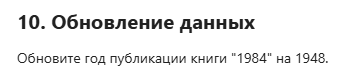

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
UPDATE books
SET year_published = 1948
WHERE title = 1984
""")

cursor.execute("""
SELECT * FROM books
""")
data = cursor.fetchall()
for i in data:
    print(i)


connection.commit()
connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


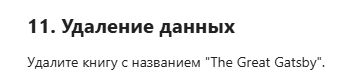

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
DELETE FROM books
WHERE title = ?;
""", ('The Great Gatsby',))


cursor.execute("""
SELECT * FROM books
""")
data = cursor.fetchall()
for i in data:
    print(i)


connection.commit()
connection.close()

(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


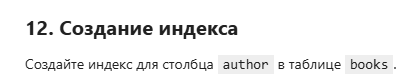

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
CREATE INDEX IF NOT EXISTS idx_books_author
ON books (author);
""")


connection.commit()
connection.close()

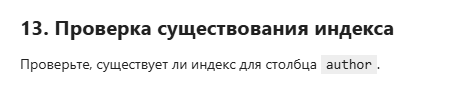



In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute("""
SELECT name FROM sqlite_master WHERE type='index' AND name='idx_books_author';
""")

res = cursor.fetchone()

if res:
    print(f"Индекс '{res[0]}' существует.")
else:
    print("Индекс не существует.")

connection.commit()
connection.close()

Индекс 'idx_books_author' существует.


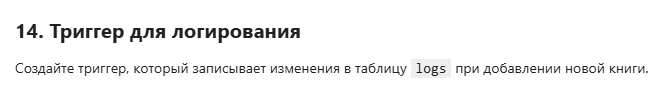

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS books_logs (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    book_id INTEGER,
    action TEXT,
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP
);
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_books_changes
AFTER INSERT ON books
FOR EACH ROW
BEGIN
    INSERT INTO books_logs (book_id, action)
    VALUES (NEW.id, 'INSERT');
END;
''')



cursor.execute("""
INSERT INTO books (title, author, year_published, genre)
VALUES (?, ?, ?, ?);
""", ("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"))



cursor.execute('''
SELECT * FROM books_logs
''')
data = cursor.fetchall()
for i in data:
    print(i)

connection.commit()
connection.close()

(1, 4, 'INSERT', '2025-04-21 17:11:01')
(2, 4, 'INSERT', '2025-04-21 17:50:39')


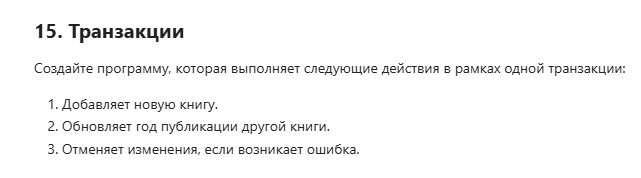

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

try:
    connection.execute('BEGIN TRANSACTION')
    cursor.execute('''
INSERT INTO books (title, author, year_published, genre)
VALUES ('Crime and punishment', 'Dostoevsky', 1865, 'Classic');
''')

    cursor.execute('''
UPDATE books
SET year_publishedeeeeeeeeeee = 1966
WHERE title = '19842';
''')

except sqlite3.Error as e:
    print(f"\nОшибка транзакции: {e}. Изменения отменены.")
    connection.rollback()

finally:
    cursor.execute('''
SELECT * FROM books
''')

    rows = cursor.fetchall()
    for row in rows:
        print(row)

    connection.close()


Ошибка транзакции: no such column: year_publishedeeeeeeeeeee. Изменения отменены.
(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')
(4, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')


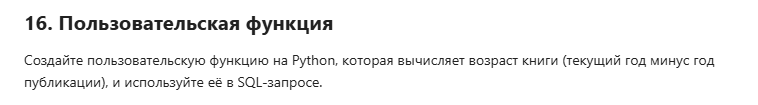

In [ ]:
from datetime import datetime

def calculate_book_age(year_published):
    current_year = datetime.now().year
    return current_year - year_published

connection = sqlite3.connect('library.db')

connection.create_function('book_age', 1, calculate_book_age)


cursor = connection.cursor()

cursor.execute('''
SELECT title, year_published, book_age(year_published)
FROM books
''')
books_with_age = cursor.fetchall()

for book in books_with_age:
    print(f"{book[0]} ({book[1]}): {book[2]} лет")

connection.close()


1984 (1948): 77 лет
To Kill a Mockingbird (1960): 65 лет
The Great Gatsby (1925): 100 лет


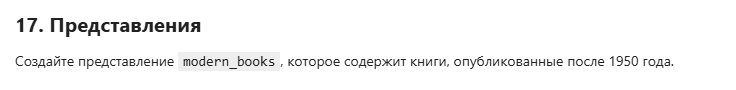

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
CREATE VIEW IF NOT EXISTS modern_books AS
SELECT * FROM books WHERE year_published > 1950
''')
connection.commit()


cursor.execute('SELECT * FROM modern_books')
modern_books = cursor.fetchall()


for book in modern_books:
    print(book)

connection.close()


(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


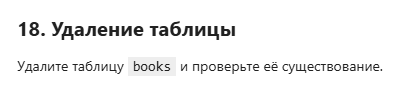

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()


cursor.execute('DROP TABLE IF EXISTS books')
connection.commit()

cursor.execute('''
SELECT name FROM sqlite_master
WHERE type='table' AND name='books'
''')
table_exists = cursor.fetchone()

if table_exists:
    print("\nТаблица books не была удалена")
else:
    print("\nТаблица books успешно удалена")


connection.close()


Таблица books успешно удалена


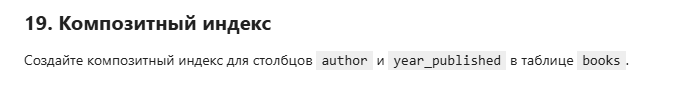

In [ ]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
CREATE INDEX IF NOT EXISTS idx_author_year
ON books (author, year_published)
''')
connection.commit()
connection.close()

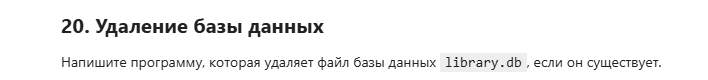

In [ ]:
import os
if os.path.exists('library.db'):
    os.remove('library.db')
    print("\nФайл базы данных library.db удален")
else:
    print("\nФайл базы данных library.db не существует")



Файл базы данных library.db удален


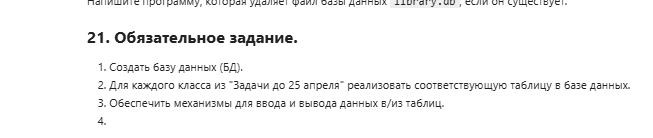

In [9]:
import sqlite3


connection = sqlite3.connect('oop.db')
cursor = connection.cursor()

classes = ['bicycle', 'Skis', 'TennisRacket', 'Customer', ' Rental']

for i in range(len(classes)):
    classes[i] = tuple(classes[i].strip().lower())


queries = [
    """
    CREATE TABLE IF NOT EXISTS bicycle (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        condition TEXT NOT NULL,
        hourly_rate REAL CHECK(hourly_rate>=0),
        type TEXT NOT NULL,
        is_available INTEGER DEFAULT 1);
    """,
    """
    CREATE TABLE IF NOT EXISTS skis (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        condition TEXT NOT NULL,
        hourly_rate REAL CHECK(hourly_rate>=0),
        length REAL CHECK(length>0),
        is_available INTEGER DEFAULT 1);
    """,
    """
    CREATE TABLE IF NOT EXISTS tennisracket (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        condition TEXT NOT NULL,
        hourly_rate REAL CHECK(hourly_rate>=0),
        string_tension REAL CHECK(string_tension>0),
        is_available INTEGER DEFAULT 1);
    """,
    """
    CREATE TABLE IF NOT EXISTS customer (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        email TEXT NOT NULL UNIQUE);
    """,
    """
    CREATE TABLE IF NOT EXISTS rental (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        customer_id INTEGER NOT NULL,
        bicycle_id INTEGER,
        tennisracket_id INTEGER,
        skis_id INTEGER,
        start_time TEXT NOT NULL,
        end_time TEXT
        );
    """

]

for i in queries:
    cursor.execute(i)


def load_bicycle(data: 'Bicycle') -> None:
    query = '''
    INSERT INTO bicycle (name, condition, hourly_rate, type)
VALUES (?, ?, ?, ?);
'''
    cursor.execute(query, (data.name, data.condition, data.hourly_rate, data.type))
    connection.commit()

def load_skis(data: 'Skis') -> None:
    query = '''
    INSERT INTO skis (name, condition, hourly_rate, length)
VALUES (?, ?, ?, ?);
'''
    cursor.execute(query, (data.name, data.condition, data.hourly_rate, data.length))
    connection.commit()


def load_tennisracket(data: 'TennisRacket') -> None:
    query = '''
    INSERT INTO tennisracket (name, condition, hourly_rate, string_tension)
VALUES (?, ?, ?, ?);
'''
    cursor.execute(query, (data.name, data.condition, data.hourly_rate, data.string_tension))
    connection.commit()


def load_customer(data: 'Customer') -> None:
    query = '''
    INSERT INTO bicycle (name, condition, hourly_rate, type)
VALUES (?, ?, ?, ?);
'''
    cursor.execute(query, (data.name, data.condition, data.hourly_rate, data.type))
    connection.commit()



def load_rental(data: 'Rental') -> None:
    query = '''
    INSERT INTO rental (customer_id, bicycle_id, tennisracket_id, skis_id, start_time, end_time)
VALUES (?, ?, ?, ?, ?, ?);
'''

    if hasattr(data.equipment, type):
        cursor.execute(query, (data.customer_id, data.equipment.id, -1, -1, data.start_time, data.end_time))
    elif hasattr(data.equipment, 'length'):
        cursor.execute(query, (data.customer_id, -1, -1, data.equipment.id, data.start_time, data.end_time))
    else:
        cursor.execute(query, (data.customer_id, -1, data.equipment.id, -1, data.start_time, data.end_time))
    connection.commit()


def get_data(name: str):
    cursor.execute(f"""SELECT * FROM {name}""")
    return cursor.fetchall()
